In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
import warnings as wr
wr.filterwarnings('ignore')

In [5]:
dataset=pd.read_csv('Sales data.csv')

In [6]:
dataset.head()

,Unnamed: 0,Date,Sales
0,0,2015-01-04,14.934283
1,1,2015-01-11,7.234714
2,2,2015-01-18,27.953771
3,3,2015-01-25,50.460597
4,4,2015-02-01,20.316933


In [12]:
dataset.drop('Unnamed: 0',axis=1,inplace=True)

In [13]:
dataset.head()

,Date,Sales
0,2015-01-04,14.934283
1,2015-01-11,7.234714
2,2015-01-18,27.953771
3,2015-01-25,50.460597
4,2015-02-01,20.316933


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    417 non-null    object 
 1   Sales   417 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.6+ KB


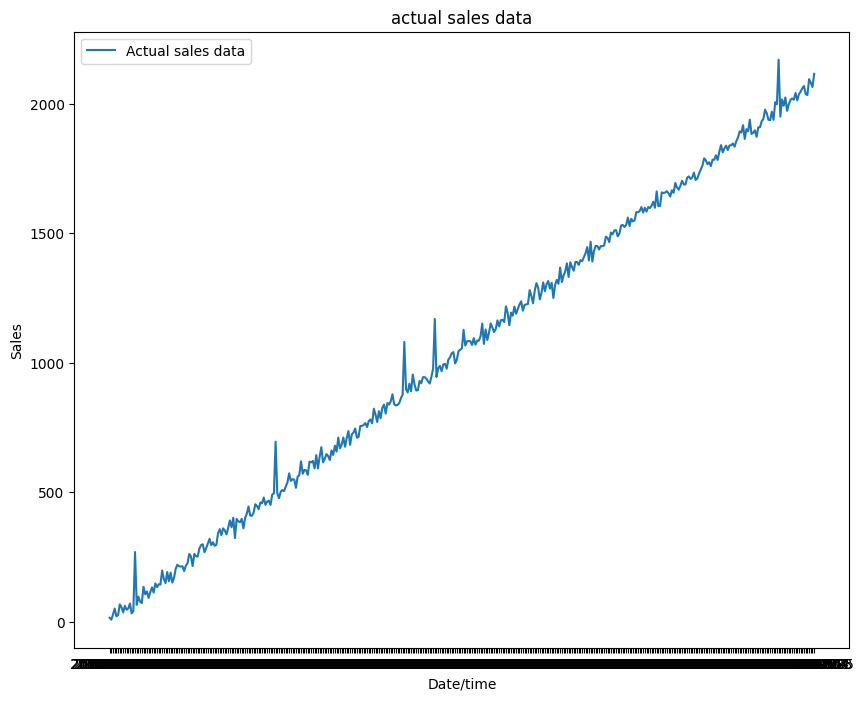

In [23]:
plt.figure(figsize=(10,8))

plt.plot(dataset['Date'],dataset['Sales'],label='Actual sales data')
plt.title('actual sales data')
plt.xlabel('Date/time')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [25]:
dataset['Date']=pd.to_datetime(dataset['Date']).dt.floor('D')
dataset.head()

,Date,Sales
0,2015-01-04,14.934283
1,2015-01-11,7.234714
2,2015-01-18,27.953771
3,2015-01-25,50.460597
4,2015-02-01,20.316933


In [50]:
dataset['DayOfYear']=dataset['Date'].dt.dayofyear
dataset['Month']=dataset['Date'].dt.month
dataset['Year']=dataset['Date'].dt.year
# dataset['WeekOfYear']=dataset['Date'].dt.weekofyear   #####Deprecated since pandas version 1.1.0.
dataset['DayOfWeek']=dataset['Date'].dt.dayofweek
dataset.head()

,Date,Sales,DayOfYear,Month,Year,DayOfWeek
0,2015-01-04,14.934283,4,1,2015,6
1,2015-01-11,7.234714,11,1,2015,6
2,2015-01-18,27.953771,18,1,2015,6
3,2015-01-25,50.460597,25,1,2015,6
4,2015-02-01,20.316933,32,2,2015,6


In [75]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       417 non-null    datetime64[ns]
 1   Sales      417 non-null    float64       
 2   DayOfYear  417 non-null    int64         
 3   Month      417 non-null    int64         
 4   Year       417 non-null    int64         
 5   DayOfWeek  417 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 19.7 KB


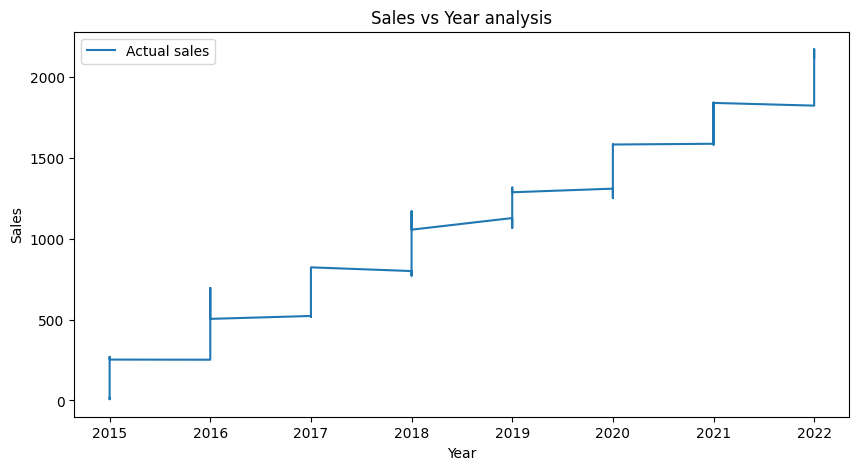

In [77]:
plt.figure(figsize=(10,5))
plt.plot(dataset['Year'],dataset['Sales'],label='Actual sales')
plt.title("Sales vs Year analysis")
plt.xlabel('Year')
plt.ylabel("Sales")
plt.legend()
plt.show()

In [78]:
train_size=int(len(dataset)*0.8)
train_data,test_data=dataset[:train_size],dataset[train_size:]

In [79]:
train_data.head()

,Date,Sales,DayOfYear,Month,Year,DayOfWeek
0,2015-01-04,14.934283,4,1,2015,6
1,2015-01-11,7.234714,11,1,2015,6
2,2015-01-18,27.953771,18,1,2015,6
3,2015-01-25,50.460597,25,1,2015,6
4,2015-02-01,20.316933,32,2,2015,6


In [80]:
test_data.head()

,Date,Sales,DayOfYear,Month,Year,DayOfWeek
333,2021-05-23,1656.456766,143,5,2021,6
334,2021-05-30,1694.502395,150,5,2021,6
335,2021-06-06,1677.058852,157,6,2021,6
336,2021-06-13,1668.490056,164,6,2021,6
337,2021-06-20,1683.572283,171,6,2021,6


In [95]:
xtrain=train_data[['DayOfYear','Month','Year','DayOfWeek']]
ytrain=train_data[['Sales']]

In [96]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   DayOfYear  333 non-null    int64
 1   Month      333 non-null    int64
 2   Year       333 non-null    int64
 3   DayOfWeek  333 non-null    int64
dtypes: int64(4)
memory usage: 10.5 KB


In [97]:
xtrain.head()

,DayOfYear,Month,Year,DayOfWeek
0,4,1,2015,6
1,11,1,2015,6
2,18,1,2015,6
3,25,1,2015,6
4,32,2,2015,6


In [99]:
ytrain.head()

,Sales
0,14.934283
1,7.234714
2,27.953771
3,50.460597
4,20.316933


In [108]:
xtest=test_data[['DayOfYear','Month','Year','DayOfWeek']]
ytest=test_data[['Sales']]

In [109]:
xtest.head()

,DayOfYear,Month,Year,DayOfWeek
333,143,5,2021,6
334,150,5,2021,6
335,157,6,2021,6
336,164,6,2021,6
337,171,6,2021,6


In [110]:
ytest.head()

,Sales
333,1656.456766
334,1694.502395
335,1677.058852
336,1668.490056
337,1683.572283


In [103]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   DayOfYear  333 non-null    int64
 1   Month      333 non-null    int64
 2   Year       333 non-null    int64
 3   DayOfWeek  333 non-null    int64
dtypes: int64(4)
memory usage: 10.5 KB


# Linear Rigression 

In [104]:
LinearModel=LinearRegression()


In [105]:
xtrain.shape

(333, 4)

In [106]:
ytrain.shape

(333, 1)

In [107]:
LinearModel.fit(xtrain,ytrain)

LinearRegression()

In [111]:
y_pred=LinearModel.predict(xtest)

In [113]:
mse=mean_squared_error(ytest,y_pred)
mse

761.4418898291613

In [116]:
LinearModel.score(xtest,ytest)

0.9530799885067525

Text(0, 0.5, 'Residuals')

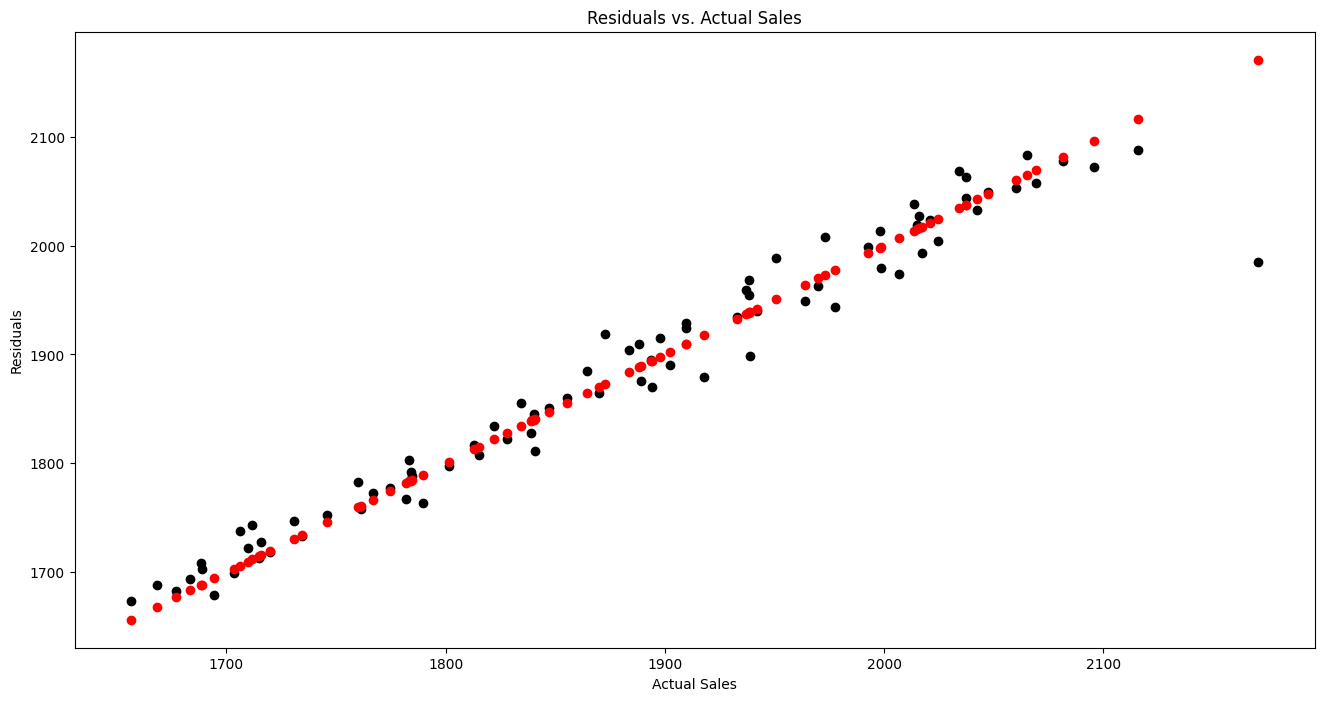

In [118]:
plt.figure(figsize=(16, 8)) 
plt.scatter(ytest, y_pred, color='black')  # actual y and predicted
plt.scatter(ytest, ytest, color='red') # 
plt.title("Residuals vs. Actual Sales") 
plt.xlabel("Actual Sales") 
plt.ylabel("Residuals") 

In [120]:
residuals=ytest-y_pred

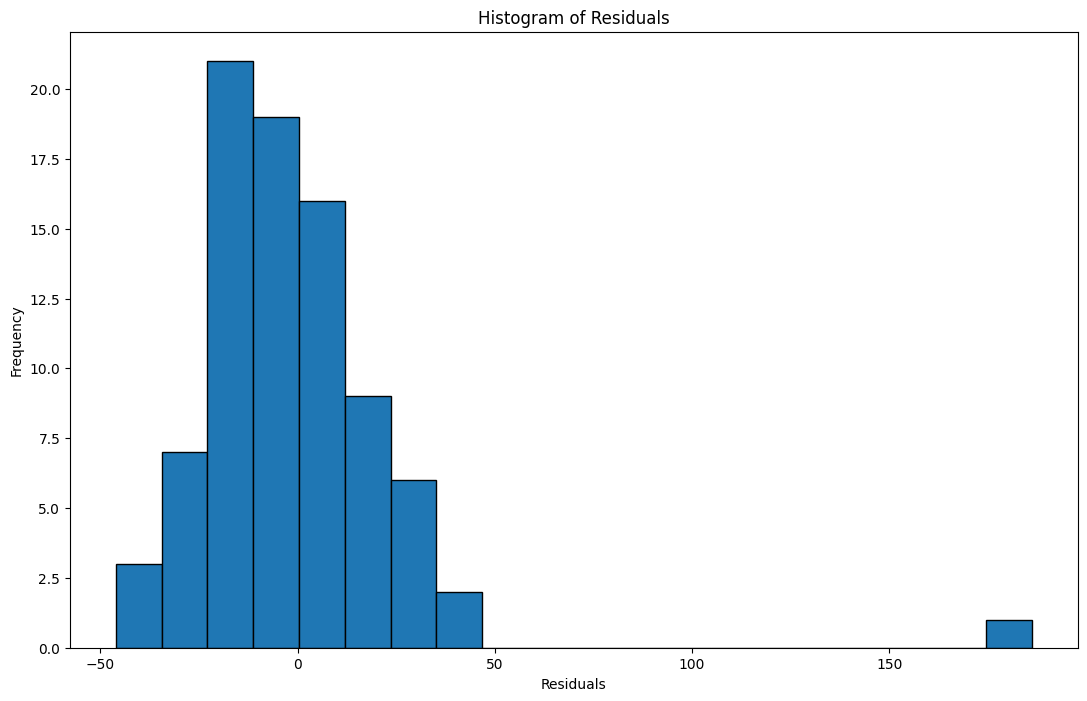

In [121]:
plt.figure(figsize=(13, 8)) 
plt.hist(residuals, bins=20, edgecolor='black')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Forecasting for future 

In [123]:
future_dates=pd.date_range(start='2023-1-1',end='2025-1-1',freq='D')
forecast_data=pd.DataFrame({"Date":future_dates})
forecast_data.head()

,Date
0,2023-01-01
1,2023-01-02
2,2023-01-03
3,2023-01-04
4,2023-01-05


In [127]:
forecast_data["DayOfWeek"] = forecast_data["Date"].dt.dayofweek
forecast_data["Month"] = forecast_data["Date"].dt.month
forecast_data["Year"] = forecast_data["Date"].dt.year
forecast_data["DayOfYear"] = forecast_data["Date"].dt.dayofyear
# forecast_data["WeekOfYear"] = forecast_data["Date"].dt.weekofyear

In [132]:
forecast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       732 non-null    datetime64[ns]
 1   DayOfWeek  732 non-null    int32         
 2   Month      732 non-null    int32         
 3   Year       732 non-null    int32         
 4   DayOfYear  732 non-null    int32         
dtypes: datetime64[ns](1), int32(4)
memory usage: 17.3 KB


In [133]:
forecast_data=forecast_data.astype({'DayOfWeek':int,'Month':int,'Year':int,'DayOfYear':int})

In [135]:
forecast_sales = LinearModel.predict(forecast_data[["DayOfYear","Month","Year","DayOfWeek" ]])

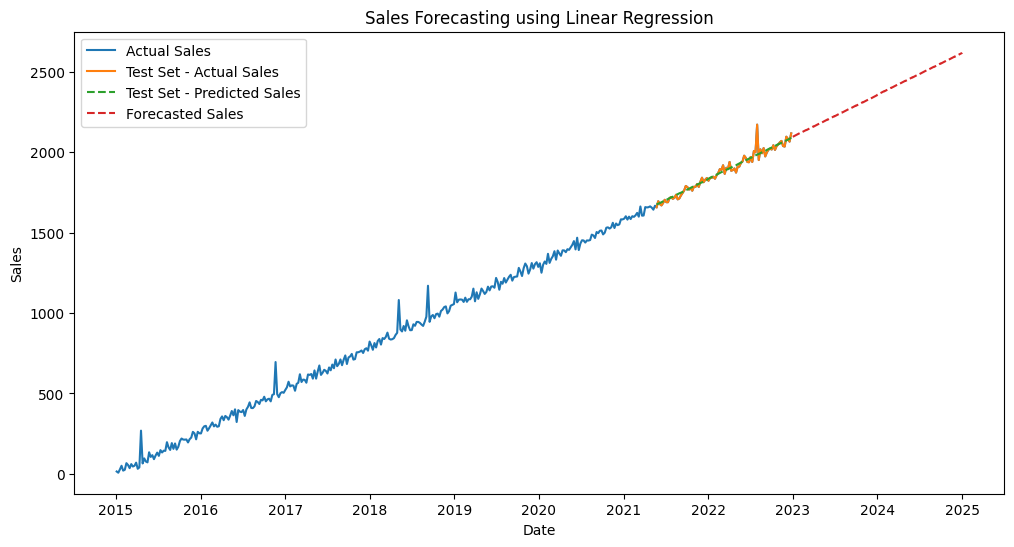

In [138]:
plt.figure(figsize=(12, 6))
plt.plot(dataset["Date"], dataset["Sales"], label="Actual Sales")
plt.plot(test_data["Date"], ytest, label="Test Set - Actual Sales")
plt.plot(test_data["Date"], y_pred, label="Test Set - Predicted Sales", linestyle="--")
plt.plot(forecast_data["Date"], forecast_sales, label="Forecasted Sales", linestyle="--") #predicted
plt.title("Sales Forecasting using Linear Regression") 
plt.xlabel("Date") 
plt.ylabel("Sales") 
plt.legend()
plt.show()

# Save ML Models

## Using 'pickle'

In [139]:
import pickle as pk

In [140]:
pk.dump(LinearModel, open('SavedLRmodel_pickle','wb') ) # write binary mode

In [141]:
reg1 = pk.load(open('SavedLRmodel_pickle','rb')) #read

In [143]:
# reg1.predict([])

## Using 'Joblib'

In [145]:
import joblib as jb 

In [146]:
jb.dump(LinearModel, 'SavedLRmodel_joblib')

['SavedLRmodel_joblib']

In [147]:
reg2=jb.load('SavedLRmodel_joblib')